In [26]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

#1.DATA JAR

MNIST DATAST LOADED

In [27]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

### Normalization

In [28]:
x_train=x_train.astype('float')/255.0
x_test=x_test.astype('float')/255.0

In [29]:
len(x_train)

60000

In [30]:
len(y_train)

60000

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Vizualization

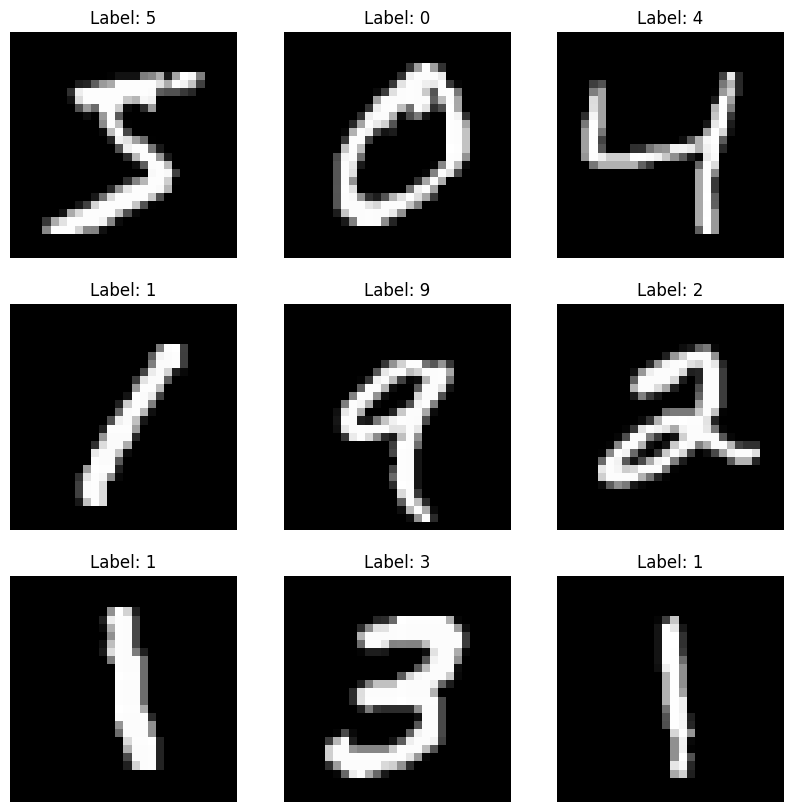

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i].astype(int)}")
    plt.axis('off')
plt.show()

#2. TASK JAR
THE TASK IS TO CLASSIFY HANDWRITTEN DIGITS

#3. MODEL JAR
THE MODEL USED IS ANN

#4. LOSS JAR
LOSS FUNCTION IS sparse_categorical_crossentropy

### ANN model

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2), # Adding dropout for regularization
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# 5.LEARNING JAR
THE EPOCHS ARE 10

#6.ACCUARCY JAR
THE ACCUARCY IS 0.9782 THAT IS 97%


In [34]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

print("Model training complete.")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8493 - loss: 0.5218 - val_accuracy: 0.9590 - val_loss: 0.1507
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9523 - loss: 0.1606 - val_accuracy: 0.9668 - val_loss: 0.1137
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9650 - loss: 0.1190 - val_accuracy: 0.9708 - val_loss: 0.0960
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9723 - loss: 0.0912 - val_accuracy: 0.9743 - val_loss: 0.0896
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9752 - loss: 0.0793 - val_accuracy: 0.9743 - val_loss: 0.0869
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9790 - loss: 0.0684 - val_accuracy: 0.9752 - val_loss: 0.0836
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9815 - loss: 0.0597 - val_accuracy: 0.9761 - val_loss: 0.0791
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9833 - loss: 0.0545 - 

### Visualize Training and Validation Accuracy

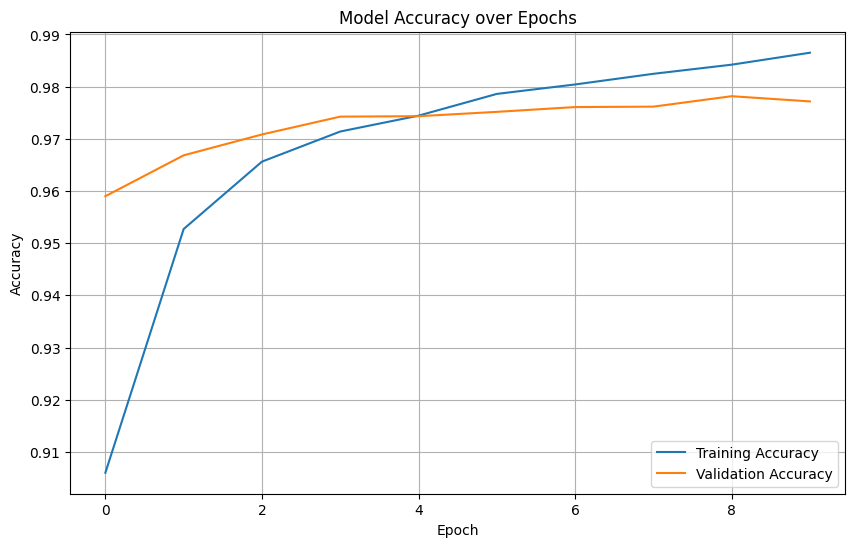

In [35]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### saving using pickle

In [40]:
import pickle

with open('mnist_model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("model saved succesfuly")

model saved succesfuly


# THE SAVED MODEL HAVE WEIGHT OF 1217KB

### Load Model from Pickle File and Apply to Test Data

We will load the model from the specified pickle file. Once loaded, we'll evaluate its performance using the test dataset (`x_test` and `y_test`) to calculate the test loss and accuracy.

In [45]:
import pickle
import numpy as np
import tensorflow as tf # Required if the pickled model is a Keras model

# Load the model from the pickle file
try:
    with open('mnist_model.pkl', 'rb') as file:
        loaded_model_for_testing = pickle.load(file)
    print("Model loaded successfully from mnist_model.pkl")

    # Check if the loaded object is a Keras model
    if isinstance(loaded_model_for_testing, tf.keras.Model):
        print("Loaded object is a Keras model. Evaluating on test data...")

        # Re-compile the model if it wasn't compiled correctly after pickling
        # This is a good practice as pickle might not preserve compilation state perfectly.
        if not loaded_model_for_testing.optimizer:
            loaded_model_for_testing.compile(
                optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
            )

        # Evaluate the loaded model on the test dataset
        test_loss_loaded, test_accuracy_loaded = loaded_model_for_testing.evaluate(x_test, y_test, verbose=0)
        print(f'\nTest Loss (from loaded model): {test_loss_loaded:.4f}')
        print(f'Test Accuracy (from loaded model): {test_accuracy_loaded:.4f}')

        # Make predictions on a few test samples (e.g., first 9 for visualization)
        predictions_loaded = loaded_model_for_testing.predict(x_test[:9]) # Changed to 9 samples for consistent visualization
        predicted_labels_loaded = np.argmax(predictions_loaded, axis=1)
        print(f'\nPredictions for first {len(predicted_labels_loaded)} test images: {predicted_labels_loaded}')
        print(f'True labels for first {len(predicted_labels_loaded)} test images: {y_test[:len(predicted_labels_loaded)].astype(int)}')

    else:
        print("Loaded object is not a Keras model. Cannot apply it to test data as a model.")
        print("Type of loaded object:", type(loaded_model_for_testing))

except FileNotFoundError:
    print("Error: 'mnist_model.pkl' not found. Please ensure the model has been saved using pickle.")
except Exception as e:
    print(f"An error occurred while loading or applying the model to test data: {e}")
    print("Reminder: Using pickle for Keras models can sometimes lead to issues. The recommended method is `tf.keras.models.load_model()`.")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model loaded successfully from mnist_model.pkl
Loaded object is a Keras model. Evaluating on test data...

Test Loss (from loaded model): 0.0792
Test Accuracy (from loaded model): 0.9784
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

Predictions for first 5 test images: [7 2 1 0 4]
True labels for first 5 test images: [7 2 1 0 4]


### Visualize Model Predictions on Test Data

Let's display the first few test images, their actual labels, and the labels predicted by the model that was loaded from the `mnist_model.pkl` file. This helps to visually assess the model's performance.

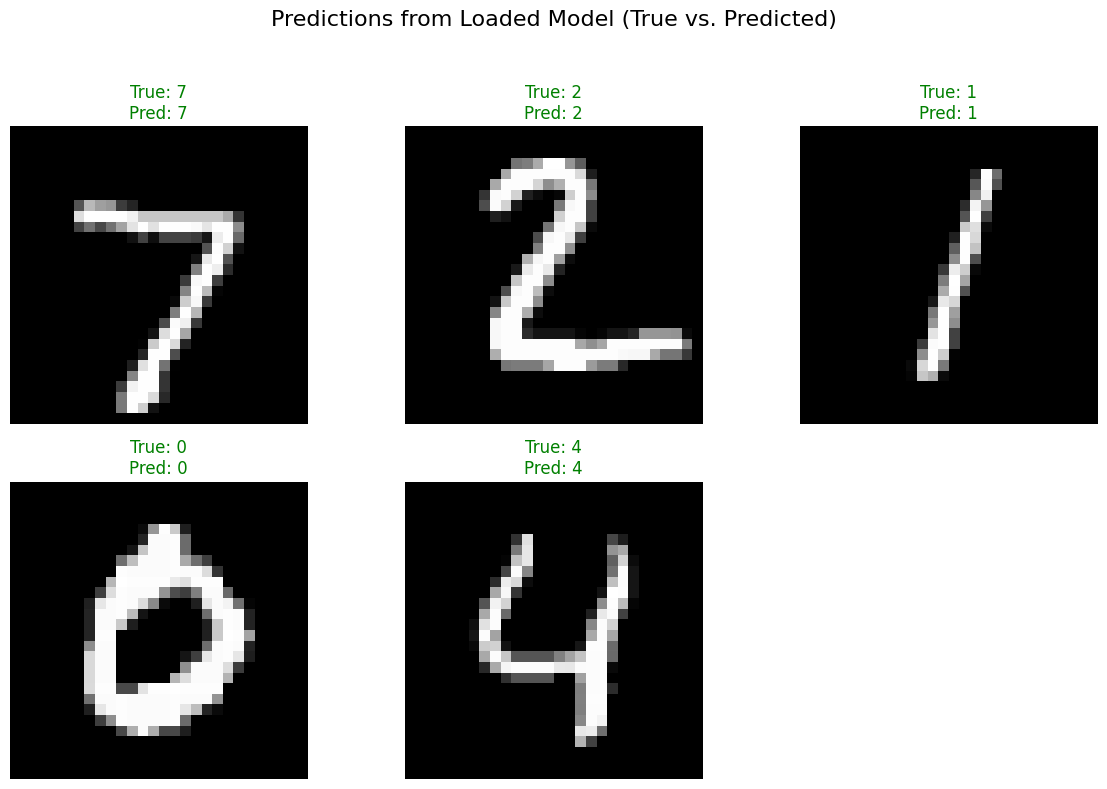

In [48]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(12, 12))
for i in range(len(predicted_labels_loaded)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i], cmap='gray')


    true_label = y_test[i].astype(int)
    predicted_label = predicted_labels_loaded[i]

    color = "green" if predicted_label == true_label else "red"
    plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
    plt.axis('off')

plt.suptitle('Predictions from Loaded Model (True vs. Predicted)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()